## Import all of the libraries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib as plt 
import matplotlib.pyplot as plt 
%matplotlib inline


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# import the dataset 
df_automobile = pd.read_csv(r"Automobile_data.csv")

# view the first few lines of the dataset
df_automobile.head()
df_automobile.tail()

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
56,81,volkswagen,sedan,97.3,171.7,ohc,four,85,27,7975.0
57,82,volkswagen,sedan,97.3,171.7,ohc,four,52,37,7995.0
58,86,volkswagen,sedan,97.3,171.7,ohc,four,100,26,9995.0
59,87,volvo,sedan,104.3,188.8,ohc,four,114,23,12940.0
60,88,volvo,wagon,104.3,188.8,ohc,four,114,23,13415.0


## Explore the data to see if there are any nulls and look at the types to see if anything needs to be changed

In [35]:
# look at the data and the dtypes 
df_automobile.info()

# count all the null values, we can see that price is missing 3, lets take a look at that
df_automobile.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             61 non-null     int64  
 1   company           61 non-null     object 
 2   body-style        61 non-null     object 
 3   wheel-base        61 non-null     float64
 4   length            61 non-null     float64
 5   engine-type       61 non-null     object 
 6   num-of-cylinders  61 non-null     object 
 7   horsepower        61 non-null     int64  
 8   average-mileage   61 non-null     int64  
 9   price             58 non-null     float64
dtypes: float64(3), int64(3), object(4)
memory usage: 4.9+ KB


index               0
company             0
body-style          0
wheel-base          0
length              0
engine-type         0
num-of-cylinders    0
horsepower          0
average-mileage     0
price               3
dtype: int64

In [36]:
# here we are singling out the NaN values for price 
missing_price = pd.isnull(df_automobile["price"])

# this is for setting all the NaN values to 0
df_automobile[missing_price] = df_automobile[missing_price].fillna(0)

In [38]:
df_automobile.head()

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


#### We can see that there are only a few unique values therefore we can convert to category

In [42]:
df_automobile['company'].value_counts()

# converting to category 
df_automobile["company"] = df_automobile["company"].astype("category")

toyota           7
bmw              6
nissan           5
mazda            5
mercedes-benz    4
volkswagen       4
audi             4
mitsubishi       4
jaguar           3
chevrolet        3
honda            3
isuzu            3
alfa-romero      3
porsche          3
volvo            2
dodge            2
Name: company, dtype: int64

In [45]:
df_automobile["body-style"].value_counts()

# converting to category 
df_automobile["body-style"] = df_automobile["body-style"].astype("category")

sedan          32
hatchback      15
wagon           9
convertible     3
hardtop         2
Name: body-style, dtype: int64

In [49]:
df_automobile["engine-type"].value_counts()

# converting to category 
df_automobile["engine-type"] = df_automobile["engine-type"].astype("category")

ohc      46
ohcv      5
dohc      5
ohcf      2
l         1
rotor     1
dohcv     1
Name: engine-type, dtype: int64

In [53]:
df_automobile["num-of-cylinders"].value_counts()

# convert to category 
df_automobile["num-of-cylinders"] = df_automobile["num-of-cylinders"].astype("category")

four      39
six       11
five       5
eight      3
twelve     1
three      1
two        1
Name: num-of-cylinders, dtype: int64

In [54]:
# view the changes we have made 
df_automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   index             61 non-null     int64   
 1   company           61 non-null     category
 2   body-style        61 non-null     category
 3   wheel-base        61 non-null     float64 
 4   length            61 non-null     float64 
 5   engine-type       61 non-null     category
 6   num-of-cylinders  61 non-null     category
 7   horsepower        61 non-null     int64   
 8   average-mileage   61 non-null     int64   
 9   price             61 non-null     float64 
dtypes: category(4), float64(3), int64(3)
memory usage: 4.8 KB


## We've cleaned it all up and did the necessary steps so now it is time for some analysis 

Let's start off by finding the most expensive car company name

In [84]:
expensive_car = df_automobile[["company", "price"]].nlargest(1, columns = "price")

expensive_car

,company,price
35,mercedes-benz,45400.0


Let's print all the car details for mercedes-benz

In [85]:
mask1 = df_automobile["company"] == "mercedes-benz"

df_automobile[mask1]

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
32,44,mercedes-benz,sedan,110.0,190.9,ohc,five,123,22,25552.0
33,45,mercedes-benz,wagon,110.0,190.9,ohc,five,123,22,28248.0
34,46,mercedes-benz,sedan,120.9,208.1,ohcv,eight,184,14,40960.0
35,47,mercedes-benz,hardtop,112.0,199.2,ohcv,eight,184,14,45400.0


What is the average price for mercedes-benz. The avg price for a mercedes-benz is $35,040. 

In [87]:
df_automobile[mask1]['price'].describe()

count        4.000000
mean     35040.000000
std       9635.514309
min      25552.000000
25%      27574.000000
50%      34604.000000
75%      42070.000000
max      45400.000000
Name: price, dtype: float64

Let's count the total cars per company

In [119]:
# count_cars = df_automobile.groupby('company')["index"].count().sort_values(ascending = False)

count_cars = df_automobile["company"].value_counts()
count_cars

toyota           7
bmw              6
mazda            5
nissan           5
audi             4
mercedes-benz    4
mitsubishi       4
volkswagen       4
alfa-romero      3
chevrolet        3
honda            3
isuzu            3
jaguar           3
porsche          3
dodge            2
volvo            2
Name: company, dtype: int64

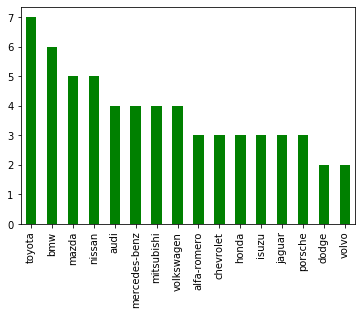

In [120]:
# making a visual on count_cars 
count_cars.plot(kind="bar", color='green')

Find each company's highest car 

In [145]:
# grouo by the company
com_cars = df_automobile.groupby("company")

# display the company and price and show the max of prices 
max_cars = com_cars['company', 'price'].max()

# sort the values by price 
max_cars.sort_values(by="price", ascending=False)

# OR
# pd.DataFrame(df_automobile.groupby("company")["price"].max())


C:\Users\13476\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,price
company,
mercedes-benz,45400.0
bmw,41315.0
porsche,37028.0
jaguar,36000.0
audi,18920.0
mazda,18344.0
alfa-romero,16500.0
toyota,15750.0
nissan,13499.0


Find the average mileage of each car making company

In [147]:
com_cars = df_automobile.groupby("company")

# display the company and avg mileage and display the mean 
avg_mile_cars = com_cars["company", "average-mileage"].mean()

# rounding the avg mile and sort the values 
round(avg_mile_cars,2).sort_values(by="average-mileage", ascending=False)

C:\Users\13476\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,average-mileage
company,
chevrolet,41.00
isuzu,33.33
volkswagen,31.75
nissan,31.40
dodge,31.00
mitsubishi,29.50
toyota,28.71
mazda,28.00
honda,26.33


Find the average horsepower for ever car company 

In [161]:
com_cars = df_automobile.groupby("company")
avg_horsepower_car = com_cars["company", "horsepower"].mean()

round(avg_horsepower_car,2).sort_values(by="horsepower", ascending=False)

C:\Users\13476\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,horsepower
company,
porsche,234.00
jaguar,204.67
mercedes-benz,153.50
bmw,144.83
alfa-romero,125.33
volvo,114.00
audi,109.25
honda,92.33
nissan,82.80


Sort all cars by the price column 

In [148]:
df_automobile.sort_values(by="price", ascending=False)

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
35,47,mercedes-benz,hardtop,112.0,199.2,ohcv,eight,184,14,45400.0
11,14,bmw,sedan,103.5,193.8,ohc,six,182,16,41315.0
34,46,mercedes-benz,sedan,120.9,208.1,ohcv,eight,184,14,40960.0
46,62,porsche,convertible,89.5,168.9,ohcf,six,207,17,37028.0
12,15,bmw,sedan,110.0,197.0,ohc,six,182,15,36880.0
...,...,...,...,...,...,...,...,...,...,...
27,36,mazda,hatchback,93.1,159.1,ohc,four,68,30,5195.0
13,16,chevrolet,hatchback,88.4,141.1,l,three,48,47,5151.0
47,63,porsche,hatchback,98.4,175.7,dohcv,eight,288,17,0.0
22,31,isuzu,sedan,94.5,155.9,ohc,four,70,38,0.0


Concatenate two dataframes

In [156]:
# creating a dataframe 

GermanCars = {'Company': ['Ford', 'Mercedes', 'BMV', 'Audi'], 'Price': [23845, 171995, 135925 , 71400]}
japaneseCars = {'Company': ['Toyota', 'Honda', 'Nissan', 'Mitsubishi '], 'Price': [29995, 23600, 61500 , 58900]}

# displaying the dataframe 

df_german = pd.DataFrame(GermanCars)
df_german.head()

df_japan = pd.DataFrame(japaneseCars)
df_japan.head()

# concatenate 
df_concat_gj = pd.concat(objs=[df_german, df_japan], keys=["German", "Japan"])
df_concat_gj

,Company,Price
0,Ford,23845
1,Mercedes,171995
2,BMV,135925
3,Audi,71400


,Company,Price
0,Toyota,29995
1,Honda,23600
2,Nissan,61500
3,Mitsubishi,58900


Company   Price
German 0         Ford   23845
       1     Mercedes  171995
       2          BMV  135925
       3         Audi   71400
Japan  0       Toyota   29995
       1        Honda   23600
       2       Nissan   61500
       3  Mitsubishi    58900

Merge two dataframes with the following conditions 

In [158]:
# create the dict 
Car_Price = {'Company': ['Toyota', 'Honda', 'BMV', 'Audi'], 'Price': [23845, 17995, 135925 , 71400]}
car_Horsepower = {'Company': ['Toyota', 'Honda', 'BMV', 'Audi'], 'horsepower': [141, 80, 182 , 160]}

# create the df 
df_car_price = pd.DataFrame(Car_Price)
df_car_horsepower = pd.DataFrame(car_Horsepower)

# merge the two dataframes
df_car_merge = df_car_price.merge(df_car_horsepower, how="inner", on="Company")
df_car_merge

,Company,Price,horsepower
0,Toyota,23845,141
1,Honda,17995,80
2,BMV,135925,182
3,Audi,71400,160


In [3]:
df_automobile.head()

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0
